<h1><center>Simple Linear Regression</center></h1>


<h4>About this Notebook</h4>
В этой записной книжке мы узнаем, как реализовать простую линейную регрессию. Мы загрузим набор данных, который связан с расходом топлива и выбросами углекислого газа автомобилей. Затем мы разделим наши данные на обучающие и тестовые наборы, создадим модель с использованием обучающего набора, оценим модель с использованием тестового набора и, наконец, используем модель для прогнозирования неизвестного значения.


### Importing Needed packages

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="reading_data">Reading the data in</h2>

In [16]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

<h2 id="data_exploration">Data Exploration</h2>
Давайте сначала проведем описательное исследование наших данных.

In [17]:
# summarize the data
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

Выберем некоторые характеристики, чтобы узнать больше.

In [18]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267

мы можем построить каждую из этих характеристик:

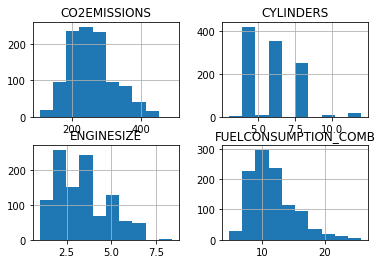

In [19]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Теперь давайте нарисуем каждую из этих характеристик в сравнении с выбросом, чтобы увидеть, насколько линейно их отношение:

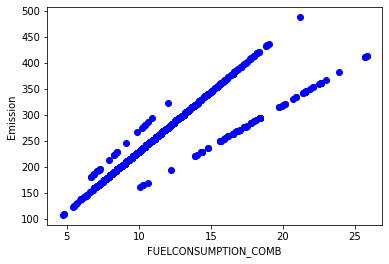

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

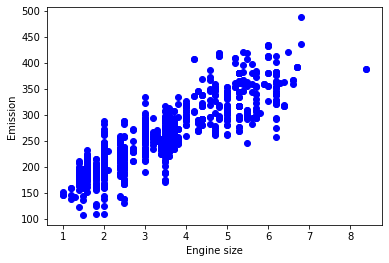

In [21]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Нарисуйте график CYLINDER vs Emission, чтобы увидеть, насколько линейно их отношение:

In [22]:
# write your code here


Дважды щелкните __здесь__ чтобы увидеть решение.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Создание обучающего и тестового набора данных
Разделение обучения и теста включает в себя разделение набора данных на наборы обучения и тестирования, которые являются взаимоисключающими. После этого вы обучаете с тренировочным набором и тестируете с тестовым набором.
Это обеспечит более точную оценку точности вне выборки, поскольку тестовый набор данных не является частью набора данных, который использовался для обучения данных. Это более реально для реальных проблем.

Это означает, что мы знаем результат каждой точки данных в этом наборе данных, что делает его отличным для тестирования! И поскольку эти данные не использовались для обучения модели, модель не знает результатов этих точек данных. Так что, по сути, это действительно тестирование вне диапозона.

Давайте разделим наш набор данных на обучающие и тестовые наборы, 80% всех данных для обучения и 20% для тестирования. Мы создим маску для выбора случайных строк, используя функцию __np.random.rand () __:

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Линейная регрессия подходит для линейной модели с коэффициентами $ \ theta = (\ theta_1, ..., \ theta_n) $, чтобы минимизировать «остаточную сумму квадратов» между независимым x в наборе данных и зависимым y в линейном приближении.

#### Train data distribution

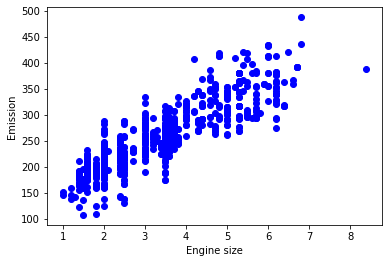

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Моделирование
Использование пакета sklearn для моделирования данных.

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.25288879]]
Intercept:  [125.21256563]


Как упоминалось ранее, __Coefficient__ и __Intercept__ в простой линейной регрессии являются параметрами линии соответствия.
Учитывая, что это простая линейная регрессия, имеющая всего 2 параметра, и зная, что параметры являются точкой пересечения и наклоном линии, sklearn может оценить их непосредственно по нашим данным.
Обратите внимание, что все данные должны быть доступны для прохождения и расчета параметров.


#### Plot outputs

мы можем построить линию соответствия по данным:

Text(0, 0.5, 'Emission')

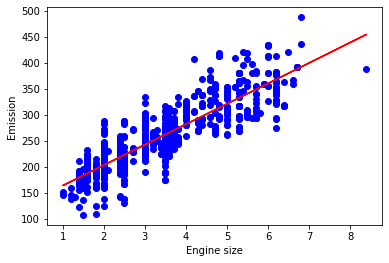

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Оценка
мы сравниваем фактические значения и прогнозируемые значения для расчета точности регрессионной модели. Оценка обеспечивает ключевую роль в разработке модели, поскольку она дает представление о тех областях, которые требуют улучшения.

Существуют различные показатели оценки модели, поэтому здесь можно использовать MSE для расчета точности нашей модели на основе набора тестов:
<ul>
    <li> Среднее абсолютное значение ошибки. Это среднее значение абсолютного значения ошибок. Это самая простая для понимания метрика, поскольку это просто средняя ошибка. </li>
    <li> Средняя квадратичная ошибка (MSE): Средняя квадратичная ошибка (MSE) - это среднее квадратичной ошибки. Этот показатель более популярен, чем средняя абсолютная ошибка, потому что фокус больше ориентирован на большие ошибки. Это связано с тем, что квадратный член экспоненциально увеличивает большие ошибки по сравнению с более мелкими. </li>
    <li> Среднеквадратичное отклонение (RMSE). Это квадратный корень из среднеквадратичной ошибки. </li>
    <li> R-квадрат - это не ошибка, а популярный показатель точности модели. Он показывает, насколько близки данные к подогнанной линии регрессии. Чем выше R-квадрат, тем лучше модель соответствует данным. Наилучшая возможная оценка - 1,0, и она может быть отрицательной (поскольку модель может быть произвольно хуже). </li>
</ul>

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.31
Residual sum of squares (MSE): 942.64
R2-score: 0.70
